# Week 2: Data Representations
## Activity:Lab Session 2

__Name__: 

__Date__: 

### Proposed Solutions to PART B

## Importing the right packages

In this assignment, we need the following packages. You can install the Python Imaging Library (PIL) thus:

```
(venv) $ pip install Pillow

or 

conda install pillow
```

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
from PIL import Image, ImageDraw



## Exercise 1: Image processing

### Exercise 1A: Crop an image (<i class="fa fa-coffee"></i>)

Consider a bounding box that surrounds the orca in the `whale.jpg` image with coordinates: $x_{min} = 181$, $y_{min} = 133$, $x_{max} = 241$, and $y_{max} = 193$.

Let's visualise it.



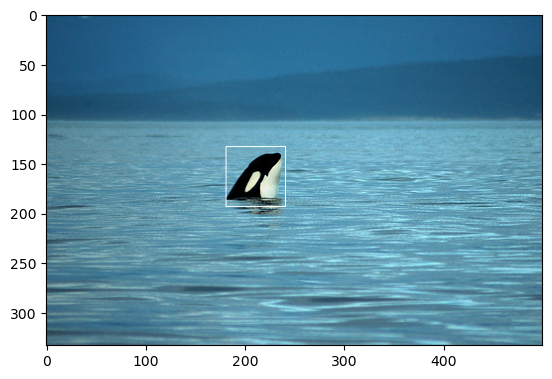

In [2]:
# Load the image
image = Image.open("whale.jpg")
# Draw bounding box
draw = ImageDraw.Draw(image)
draw.rectangle(((181, 133), (241, 193)), fill=None)
plt.imshow(image, )

Can you crop the whale image given its bounding box?

(333, 500, 3)


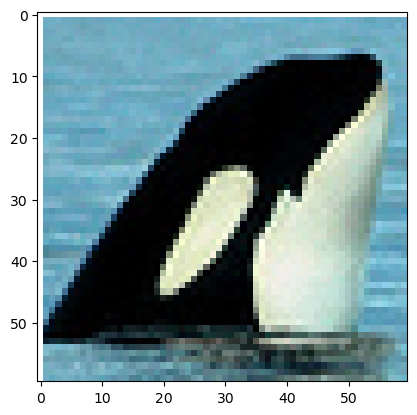

In [3]:
def crop(data, xmin, ymin, xmax, ymax):
    """
    doc-string
    """
    # Solution here
    return data[ymin:ymax, xmin:xmax]


# Convert image to a n-dimensional array
data = np.array(image)
print(data.shape)
# Crop the image
orca = crop(data, 181, 133, 241, 193)
# View the result
plt.imshow(orca)

(500, 333, 3)


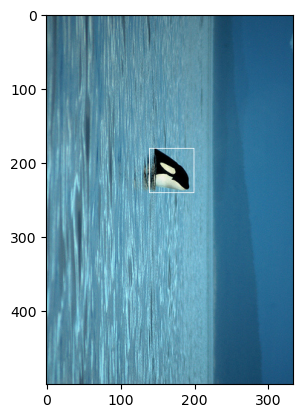

In [4]:
# Some more image processing functions: image rotation
rotated = np.rot90(data, k=1, axes=(1,0))
# print the shapre of the rotated image data
print(rotated.shape)
# view the rotated image
plt.imshow(rotated)

### Exercise 1B: Grayscale (<i class="fa fa-coffee"></i><i class="fa fa-coffee"></i>)

Can you convert one or more images to grayscale?
Image to convert:

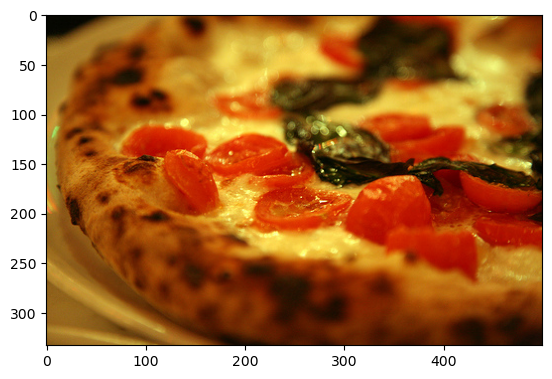

In [5]:
image = Image.open("pizza.jpg")
data = np.array(image)
plt.imshow(data)

Let's look at the shape of the image (as a `numpy` array):

In [6]:
data.shape

(333, 500, 3)

The data is organised in three 2-dimensional arrays, representing three colors: red (0), green (1) and blue (2). For example, every value in `data[:, :, 0]` is an integer value between 0 and 255 representing how red is each image pixel.


We can derive a grayscale version of an image with the following formula:

$Y = 0.2126R + 0.7152G + 0.0722B$

where $Y$ is the grayscale pixel value based on the red ($R$), green ($G$) and blue ($B$) pixel values.


Use the grayscale formulae to solve this exercise.

In [7]:
def grayscale(data):
    """
    doc-string
    """
    # Solution
    # N/B '@' was introduced in Python 3.5 and it is used as a matrix multiplication
    return data @ [0.2126, 0.7152, 0.0722]


# Convert image to grayscale
grayscale = grayscale(data)

When plotting the result, use a `matplotlib` colormap that corresponds to the color we wish to see (in our case, `gray`).

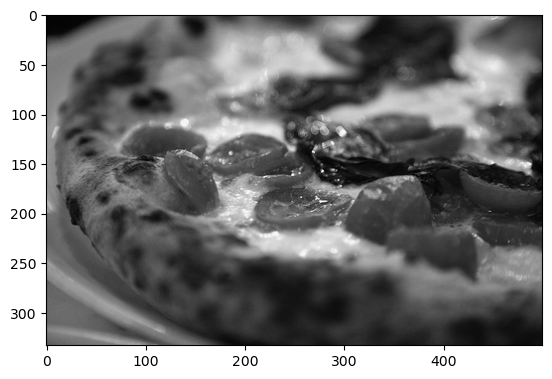

In [8]:
# plot using a gray colormap to view the scaled pixel values
plt.imshow(grayscale, cmap='gray')

#### Let's explore more the grayscale problem using a $2 \times 2$ list and a pixel array in Python

[[[255.   0.   0.]
  [  0. 255.   0.]]

 [[  0.   0. 255.]
  [255. 255. 255.]]]


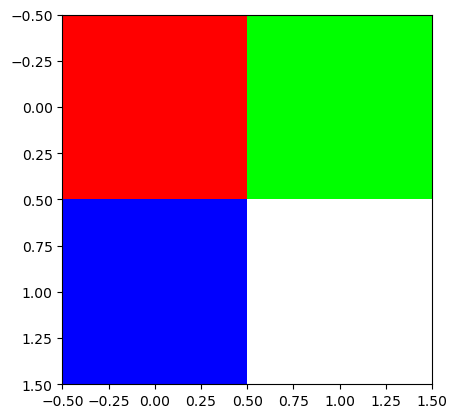

In [9]:
# Declare and define the 1-D lists R, G, B and K 
# corresponding to the colour values for Red, Green, Blue and all white.
# All lists here contain the same data types (float).
R = [255., 0., 0.]
G = [0., 255., 0.]
B = [0., 0., 255.]
K = [255., 255., 255.]

# get the type of R
type(R)
# the output will return type list

# Declare and define an array P4 by copying the list elements.
P4 = np.array([[R, G], 
               [B, K]])

print(P4)

# Note: if I use function imshow() the data needs to be clipped 
# to be properly viewed.
# To avoid data be clipped I need to scale it down or normalise it to unit. 
# 
P4 = P4/255.

# Now normalised data can be properly viewed using function imshow()
plt.imshow(P4)



In [10]:
P4.shape
# Notice that function shape will return the size of the array 
# and since P4 consists of the (normalised) elements of lists 
# R, G, B and K then it will
# return the size of the copied elements, too.

(2, 2, 3)

In [11]:
# Declare array rgbk by copying array P4
rgbk = P4.copy()
print(rgbk)

# access different slices of the array rgbk
P4[1, 0, :]

[[[1. 0. 0.]
  [0. 1. 0.]]

 [[0. 0. 1.]
  [1. 1. 1.]]]


array([0., 0., 1.])

In [12]:
# Now we want to convert the normalised P4 data into grayscale.
# The equation for the grayscale is:
# Result = 0.2126xR + 0.7152xG + 0.0722xB + 1.0xK

# Declare and define an array called result using function np.zeros().
result = np.zeros((2, 2), np.float32)
# Output the data of the array.
result
# Apply the above equation on each data element of P4.
# Note that P4 has a multidimensional structure of (2, 2, 3).
result[0, 0] = P4[0, 0, :] @ [0.2126, 0.7152, 0.0722]
result[0, 1] = P4[0, 1, :] @ [0.2126, 0.7152, 0.0722]
result[1, 0] = P4[1, 0, :] @ [0.2126, 0.7152, 0.0722]
result[1, 1] = P4[1, 1, :] @ [0.2126, 0.7152, 0.0722]
result

array([[0.2126, 0.7152],
       [0.0722, 1.    ]], dtype=float32)

In [13]:
# Instead of multiplying each element of P4, 
# I could use multiplication symbol "@" and 
# apply it to the whole multidimensional array rgbk
# (copy of P4)
rgbk @ [0.2126, 0.7152, 0.0722]

array([[0.2126, 0.7152],
       [0.0722, 1.    ]])

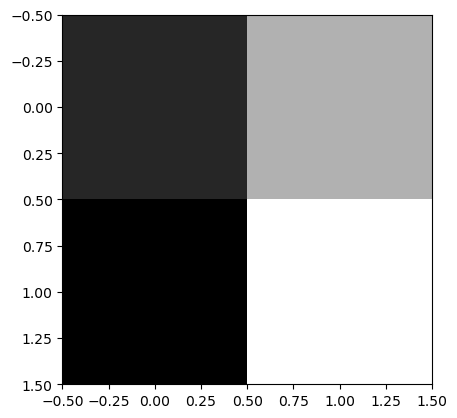

In [14]:
# Plot the grayscale converted data of P4 i.e. result dataframe.
# Use a 'gray' colormap.
plt.imshow(result, cmap='gray')



### Exercise 1C: Normalise an image (<i class="fa fa-coffee"></i>)

Can you normalise all pixel values of an image in the range between $0$ and $1$ ?


In [15]:
def normalise(data):
    """
    Divides each pixel by the highest possible value, 255
    """
    # Solution 
    return data / 255.

# Normalise image pixel values to be in [0, 1]
normalised = normalise(data)




## Exercise 2: Softmax (<i class="fa fa-coffee"></i><i class="fa fa-coffee"></i>)

Can you compute the softmax function for an array?

Given an 1-D array with $n$ values $x_{1}, x_{2}, \dots, x_{n}$, the softmax function produces $y_{1}, y_{2}, \dots, y_{n}$, where all $y$ values are between 0 and 1 and they sum up to 1:

$y_{i} = \frac{\exp(x_{i})}{\sum_{j=1}^{n} \exp(x_{j})}$



In [16]:
def softmax(data):
    """
    Compute the softmax function for a multi-dimensional array.
    """
    # Solution
    return np.exp(data) / np.sum(np.exp(data), axis=data.ndim - 1, keepdims=True)        


data = np.array([1, 1, 1, 1])

# the result contains all the probabilities of the data in the multi-dimensional array
result = softmax(data)
print("Pass" if np.array_equal(result, np.array([0.25, 0.25, 0.25, 0.25])) else "Fail")

Pass


__TIP1.__ Use the [numpy.exp()](https://numpy.org/doc/stable/reference/generated/numpy.exp.html) and [numpy.sum()](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) functions.

__TIP2.__ If `data` is a 2-dimensional array, perform softmax per row.


## Exercise 3: Inference

You are given the _weights_ of two simple, fully-connected neural networks: one is trained to classify 10 hand-written digits (from 0 to 9), and the other to classify 10 fashion items, e.g. t-shirts, trousers, coats, and so on. 

Your task is to test how well the pre-trained models can classify images in a corresponding dataset.

You are provided with two datasets. The [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset contains 10,000 $28 \times 28$ grayscale images from 10 fashion categories. The category labels are:


  | Label | Description |
  |:-----:|:------------|
  |   0   | T-shirt/top |
  |   1   | Trouser     |
  |   2   | Pullover    |
  |   3   | Dress       |
  |   4   | Coat        |
  |   5   | Sandal      |
  |   6   | Shirt       |
  |   7   | Sneaker     |
  |   8   | Bag         |
  |   9   | Ankle boot  |
  
  

Similarly, the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) contains 10,000 $28 \times 28$ grayscale images of 10 hand-written digits. Labels are self-explanatory (that is, label 0 corresponds to digit 0, 1 to 1, and so on). __You can choose to work with either dataset, or both. After all, the solution and analysis is the same in both cases.__


Below is function that loads either dataset in memory as a NumPy array:


In [126]:
import os
# Note that here you do not need to know in depth what a neural netowrk does;
# instead, a neural network here can be considered as a 'black box' which can
# take some inputs, uses some weights and transforms those inputs into certain outputs.

def load(directory):
    labelsfile = os.path.join(directory, 't10k-labels-fashion-idx1-ubyte.gz')
    imagesfile = os.path.join(directory, 't10k-images-fashion-idx3-ubyte.gz')
      
    # Load labels
    with gzip.open(labelsfile, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)
    
    # Load images
    with gzip.open(imagesfile, 'rb') as f:
        images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(len(labels), 28, 28)
        
    return images, labels




For example:

True
The (true) label of the image is 9


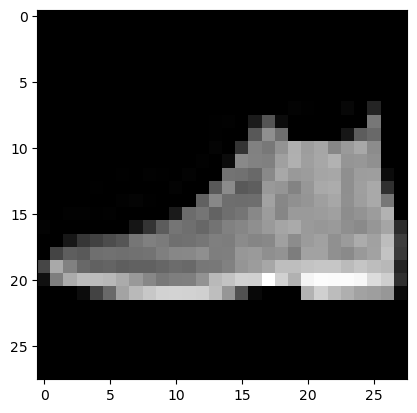

In [129]:

# Call function load() defined above.
# It returns the images with their corresponding labels.
images, labels = load('..\TADA_wk2_Sept23_24')

# Test whether any of the images contains a NAN, INF, or NINF floating around somewhere.
# If FALSE then there is at least one image that contains no viewable data.
print(np.isfinite(images).all())

# We need to normalise image pixels between 0 and 1 to be properly displayed
# using the function imshow().
images = images / 255.

#print(len(images))
# Select any of the images and view it.
plt.imshow(images[0], cmap='gray')
# Display the lable corresponding to that image.
print('The (true) label of the image is', labels[0])  
# For the selected image[0] the closest label matches with an ankle boot (see table above)



### Exercise 3A:Classify one (<i class="fa fa-coffee"></i>)

Given an image from a dataset, can you predict the image's label? You can predict the label $y$ of an image ${X}$, given parameters $w$ and $b$, as follows:

$y = \arg\max(\mathrm{softmax} (X w + b))$

Iterate over all the images and compute their prediction accuracy.

#### Assumptions & Notes

1. Image pixel values should be normalised between 0 and 1.
2. Parameter $w$ has shape `(784, 10)`. Why 784? Because 28 $\times$ 28 equals 784. 
   See __Appendix A__ at the end of this notebook for an interpretation of weights.
3. Parameter $b$ has shape `(10,)`.


In [132]:
def predictOne(image, weights, bias):
    """
    Given an image from a dataset, predicts the image's label.
    """
    # Solution
    # Reshape the size of the image to [1, 784]
    image = image.reshape(1, 784)
    # From the theory of neural networks, the output of a hidden layer neuron
    # is the same as the inputs multiplied by the neuron weights plus the neuron biases.
    neuronOut = image @ weights + bias
    
    # Use the provided formula from above to predict the label Y:
    # y = arg max(softmax(X w + b))
    return np.argmax(softmax(neuronOut.flatten()))


# Load parameters as a numpy array
weights = np.load('fashion_weights.npy')
bias = np.load('fashion_bias.npy')

# Iterate over all images and compute prediction accuracy
# Solution

# initialise variable correct to zero
correct = 0

# call for each image the function predictOne 
for i in range(len(images)):
    # For each image, predict a label
    X = images[i]
    y = predictOne(X, weights, bias)
     
    # increase the counter if the predicted y value 
    # matches with the label value.
    if y == labels[i]:
        correct += 1

# Compute accuracy (as a percentage) of the matched predicted values
# with the label ones for the total number of images.
accuracy = 100 * correct / len(images)

# print an informative message about the the accuracy achieved.
print(f'{correct}/{len(images)} predicted correctly; {accuracy:.1f}% accuracy.')



8470/10000 predicted correctly; 84.7% accuracy.



### Exercise 3B:Classify many (<i class="fa fa-coffee"></i>)

Can you classify $N > 1$ images from the dataset?


In [135]:
def predictMany(images, weights, bias):
    """
    Given an image dataset, predicts the label for each image.
    """
    # Solution 
    
    # Test first that all your images have the correct shape
    assert images.ndim == 3
    
    
    # Then, expand shape; there are N images of size H x W
    N, H, W = images.shape
    
    # Reshape those images into Nx H*W
    # Prepare your images to be used for predicting their labels.
    images = images.reshape(N, H * W)
    
    # From the theory of neural networks, the output of a hidden layer neuron
    # is the same as the inputs multiplied by the neuron weights plus the neuron biases.
    neuronOut_many = images @ weights + bias
    # Call the function softmax() for computing the probabilities
    # of all the images.
    probabilities = softmax(neuronOut_many)
    # Compute the predictions.
    predictions = np.argmax(probabilities, axis=1)
    
    return predictions


# Load parameters as a numpy array
weights_many = np.load('fashion_weights.npy')
bias_many = np.load('fashion_bias.npy')

y = predictMany(images, weights_many, bias_many)

# Compute accuracy
accuracy = 100. * (y == labels).mean()

print(f'The overall accuracy is {accuracy:.1f}%.')


The overall accuracy is 84.7%.


### Exercise 3C: Analysis
What is the overall accuracy of the model (i.e., for all 10,000 images in the dataset)? ()

You should expect a 92.6% and 84.7% accuracy for the MNIST and Fashion-MNIST dataset, respectively.

What is the accuracy per category? ()

In [139]:
# For the Fashion-MNIST dataset notice that there are 10 categories or aka 10 classes.

# Iterate over the images and categorise them in each of those 10 categories.
for i in range(10):
    # Copy the labels for each image into the array indices.
    indices = np.where(labels == i)
    # Use those indices to slice the images into those 10 categories.
    partition = images[indices[0], :, :]
    # Then, call function predictMany() to calculate the prediction and 
    # then the accuracy for each category (class).
    y = predictMany(partition, weights_many, bias_many)
    accuracy = 100. * (y == i).mean()
    # Display an informative message with the shown accuracies for each class.
    print(f'The accuracy for class {i} is {accuracy:.1f}%.')

The accuracy for class 0 is 80.4%.
The accuracy for class 1 is 96.1%.
The accuracy for class 2 is 72.3%.
The accuracy for class 3 is 86.2%.
The accuracy for class 4 is 75.5%.
The accuracy for class 5 is 91.9%.
The accuracy for class 6 is 58.2%.
The accuracy for class 7 is 95.7%.
The accuracy for class 8 is 96.6%.
The accuracy for class 9 is 94.1%.



### Appendix A: Food-for-thought
### Interpretation of weights

Parameter $w$ has shape `(768, 10)`. 


You can interpret it as follows:
$w[:, 0]$ are the weights for category 0, $w[:, 1]$ the weights for category 1, and so on. Each of the 768 weights denote how important is each of the 768 pixel values of an image (also known as input features) for a particular category. 

In other words, parameters $w$ amplify the characteristic features of a category. Let's see this with an example, the trained weights to identify the hand-written digit 0.

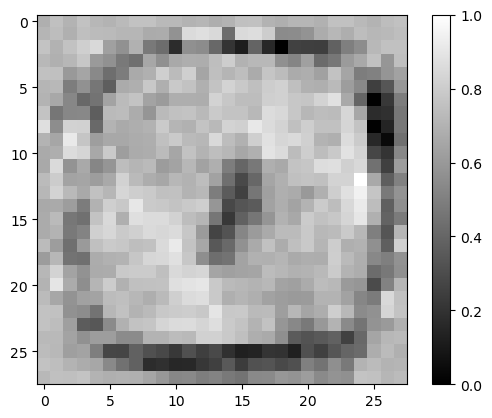

In [146]:
# Load the weights for the MNIST dataset.
weights_MNIST = np.load('mnist_weights.npy')

# What are the charecteristics of the digit 0?
# Reshape the weights into [28, 28] from [768, 10].
# Notice that weights_MNIST[:,0] sorresponds to digit 0.
a = weights_MNIST[:,0].reshape([28, 28])

# Normalise the weights for digit 0 to be between 0 and 1 (for presentation purposes only)
b = (a - np.min(a))/np.ptp(a)

# Visualise the normalised weights for digit 0.
fg, ax = plt.subplots()
plot = ax.imshow(b, cmap='gray')
fg.colorbar(plot, ax=ax)
